# 📊 Analyse Big Data – Consommation Mobile des Clients Orange


Ce notebook vous guide dans l’analyse d’un jeu de données fictif représentant des clients Orange au Cameroun.

📁 Dataset : `dataset_clients_orange.csv`

Chaque ligne représente un client avec des informations sur sa consommation téléphonique et internet.

## 🎯 Objectifs
1. Explorer les données
2. Visualiser les comportements de consommation
3. Réaliser un clustering (KMeans)
4. Interpréter les résultats et proposer des recommandations


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 📥 Chargement du Dataset

In [181]:
df = pd.read_csv("dataset_clients_orange.csv")
df.head()


,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,10001,56,Sud-Ouest,prépayé,39,2363,29,2362
1,10002,69,Centre,prépayé,220,1300,41,6045
2,10003,46,Littoral,prépayé,124,1612,36,4624
3,10004,32,Littoral,postpayé,57,1966,29,7540
4,10005,60,Sud-Ouest,prépayé,135,790,27,4654


## 🔍 Analyse exploratoire

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        1000 non-null   int64  
 1   age              1000 non-null   int64  
 2   region           1000 non-null   object 
 3   forfait_type     1000 non-null   int64  
 4   appels_min       1000 non-null   int64  
 5   data_mo          1000 non-null   int64  
 6   sms_envoyes      1000 non-null   int64  
 7   montant_facture  1000 non-null   int64  
 8   cluster          1000 non-null   int32  
 9   pca1             1000 non-null   float64
 10  pca2             1000 non-null   float64
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 82.2+ KB


**Vérification des valeurs manquantes, doublons**

In [187]:
df.isnull()

,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [189]:
df.isnull().sum()

client_id          0
age                0
region             0
forfait_type       0
appels_min         0
data_mo            0
sms_envoyes        0
montant_facture    0
dtype: int64

**Verification des doublons**

In [192]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

**total de doublons**

In [195]:
df.duplicated().sum()

0

# Statistiques descriptives


In [198]:
df.describe

<bound method NDFrame.describe of      client_id  age      region forfait_type  appels_min  data_mo  \
0        10001   56   Sud-Ouest      prépayé          39     2363   
1        10002   69      Centre      prépayé         220     1300   
2        10003   46    Littoral      prépayé         124     1612   
3        10004   32    Littoral     postpayé          57     1966   
4        10005   60   Sud-Ouest      prépayé         135      790   
..         ...  ...         ...          ...         ...      ...   
995      10996   60      Centre      prépayé         241     2226   
996      10997   64    Littoral      prépayé         111      830   
997      10998   62  Nord-Ouest      prépayé         156     1846   
998      10999   35    Adamaoua      prépayé         272     1197   
999      11000   55    Adamaoua      prépayé         162     2359   

     sms_envoyes  montant_facture  
0             29             2362  
1             41             6045  
2             36             

# Répartition des clients par région, type de forfait, etc.

**visualition des colonnes**

In [202]:
df.columns

Index(['client_id', 'age', 'region', 'forfait_type', 'appels_min', 'data_mo',
       'sms_envoyes', 'montant_facture'],
      dtype='object')

**nombres de client**

In [205]:
df.value_counts().sum()

1000

In [207]:
df['region'].value_counts()

region
Adamaoua      212
Sud-Ouest     208
Nord-Ouest    206
Littoral      196
Centre        178
Name: count, dtype: int64

In [209]:
df['forfait_type'].value_counts()

forfait_type
prépayé     704
postpayé    296
Name: count, dtype: int64

In [211]:
df['age'].value_counts()

age
43    28
45    28
50    27
52    27
66    26
49    25
18    24
64    23
41    23
56    23
40    23
22    23
54    22
68    22
62    22
65    21
69    21
42    21
29    21
33    21
19    21
20    21
25    21
34    20
53    20
61    19
39    19
46    19
38    18
47    18
36    18
31    18
26    17
58    16
51    16
30    16
28    16
67    16
59    16
44    16
21    15
57    15
23    15
32    15
35    15
55    14
27    14
37    14
24    14
48    13
63    13
60    11
Name: count, dtype: int64

## 📊 Visualisations

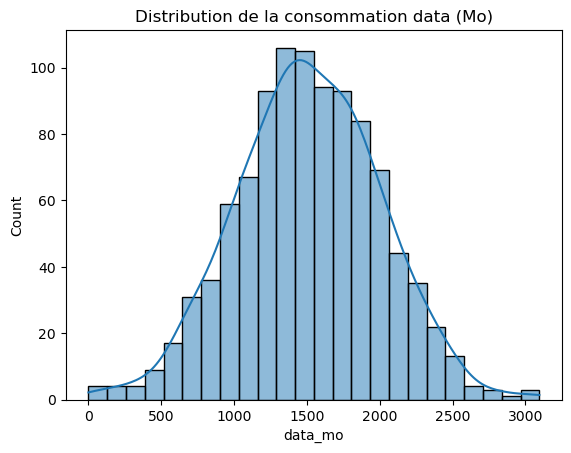

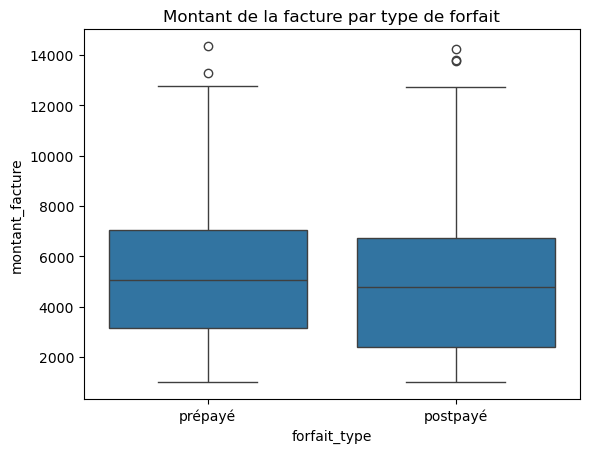

In [216]:
sns.histplot(df['data_mo'], kde=True)
plt.title("Distribution de la consommation data (Mo)")
plt.show()

sns.boxplot(x='forfait_type', y='montant_facture', data=df)
plt.title("Montant de la facture par type de forfait")
plt.show()


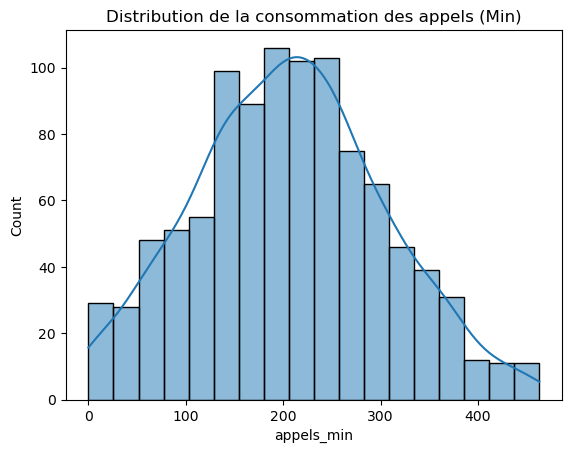

In [217]:
sns.histplot(df['appels_min'], kde=True)
plt.title("Distribution de la consommation des appels (Min)")
plt.show()


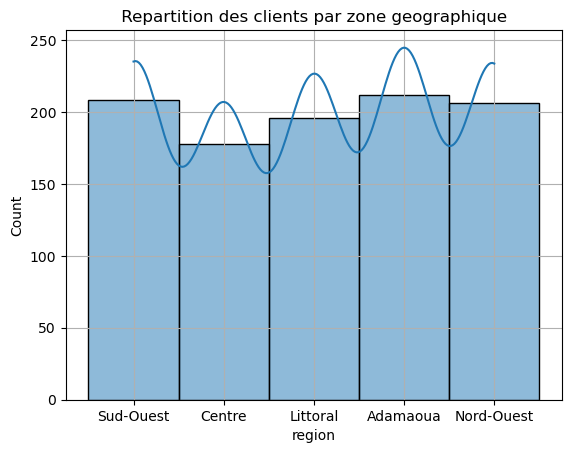

In [219]:
sns.histplot(df['region'], kde=True)
plt.title(" Repartition des clients par zone geographique ")
plt.plot()
plt.grid(True)
plt.show()


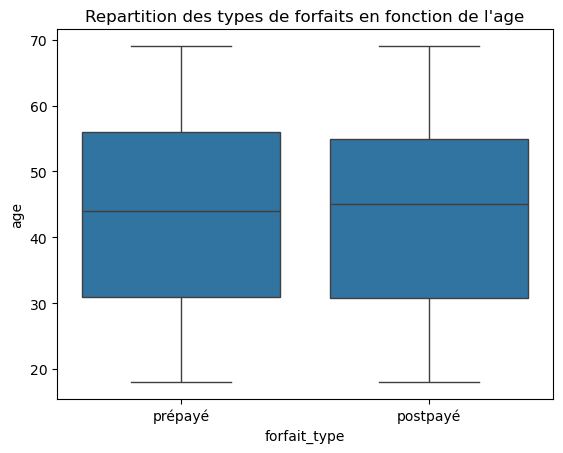

In [222]:
sns.boxplot(x='forfait_type', y='age', data=df)
plt.title("Repartition des types de forfaits en fonction de l'age")
plt.show()

## ⚙️ Préparation des données pour le clustering

**Encoder la forfait_type pour pouvoir mieux analyser et comprendre les clients**

In [234]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['forfait_type'] = encoder.fit_transform(df['forfait_type'])
df


,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,10001,56,Sud-Ouest,1,39,2363,29,2362
1,10002,69,Centre,1,220,1300,41,6045
2,10003,46,Littoral,1,124,1612,36,4624
3,10004,32,Littoral,0,57,1966,29,7540
4,10005,60,Sud-Ouest,1,135,790,27,4654
...,...,...,...,...,...,...,...,...
995,10996,60,Centre,1,241,2226,26,7199
996,10997,64,Littoral,1,111,830,40,1000
997,10998,62,Nord-Ouest,1,156,1846,33,5934
998,10999,35,Adamaoua,1,272,1197,49,1436


# forfait prépayé = 1 ou postpayé = 0

**Ajoutez la variable forfait_type enfin de mieux etudiez les clients**

In [237]:
features = ['age', 'appels_min', 'data_mo', 'sms_envoyes', 'montant_facture', 'forfait_type']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 📌 Clustering des clients (KMeans)

In [250]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters


## 🌀 Visualisation des clusters avec PCA

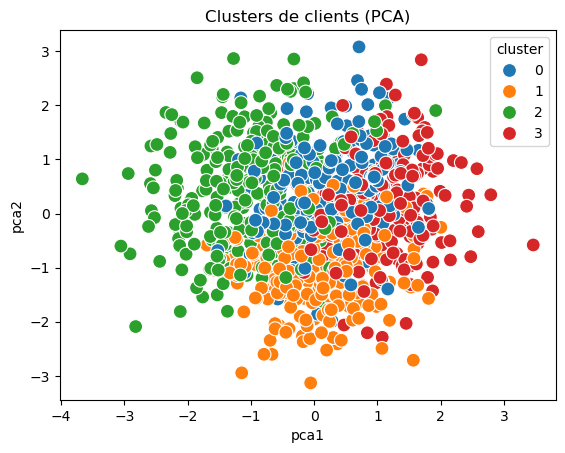

In [261]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
df['pca1'] = reduced[:, 0]
df['pca2'] = reduced[:, 1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10', alpha = 1, s = 100)
plt.title("Clusters de clients (PCA)")
plt.show()


# Effectuons la moyenne des variables pour pouvoir determiner la moyenne de chaque features dans les differents clusters

In [320]:
cluster_moy = df.groupby("cluster").mean(numeric_only=True)
print(cluster_moy)

            client_id        age  forfait_type  appels_min      data_mo  \
cluster                                                                   
0        10493.038462  56.511538      1.000000  182.984615  1706.503846   
1        10497.373950  29.823529      1.000000  217.684874  1567.823529   
2        10511.764505  43.658703      0.000000  201.337884  1582.924915   
3        10497.550239  44.191388      0.985646  227.468900  1095.976077   

         sms_envoyes  montant_facture      pca1      pca2  
cluster                                                    
0          28.834615      5235.842308  0.230674  0.343800  
1          26.983193      5376.365546  0.041707 -0.968886  
2          29.580205      4974.904437 -1.022481  0.448453  
3          34.717703      4643.473684  1.098974  0.046938  


In [343]:
for cluster_id, row in cluster_moy.iterrows():
    print(f"\n--- Cluster {cluster_id} ---")
    print(f"Age moyen         : {row['age']:.1f} ans")
    print(f"Appels/mois       : {row['appels_min']:.0f} min")
    print(f"Internet/mois     : {row['data_mo']:.0f} Mo")
    print(f"SMS envoyes       : {row['sms_envoyes']:.0f}")
    print(f"Facture moyenne   : {row['montant_facture']:.0f} FCFA")
    print(f"Type de forfait   : {row['forfait_type']:.0f} forfait")



--- Cluster 0 ---
Age moyen         : 56.5 ans
Appels/mois       : 183 min
Internet/mois     : 1707 Mo
SMS envoyes       : 29
Facture moyenne   : 5236 FCFA
Type de forfait   : 1 forfait

--- Cluster 1 ---
Age moyen         : 29.8 ans
Appels/mois       : 218 min
Internet/mois     : 1568 Mo
SMS envoyes       : 27
Facture moyenne   : 5376 FCFA
Type de forfait   : 1 forfait

--- Cluster 2 ---
Age moyen         : 43.7 ans
Appels/mois       : 201 min
Internet/mois     : 1583 Mo
SMS envoyes       : 30
Facture moyenne   : 4975 FCFA
Type de forfait   : 0 forfait

--- Cluster 3 ---
Age moyen         : 44.2 ans
Appels/mois       : 227 min
Internet/mois     : 1096 Mo
SMS envoyes       : 35
Facture moyenne   : 4643 FCFA
Type de forfait   : 1 forfait


## 💡 Recommandations stratégiques


- Identifier les groupes de clients à forte consommation data et faible facture
- Proposer des migrations de forfait pour certains clusters
- Créer des offres SMS personnalisées pour les clients intensifs en messages


# Identifions les groupes de clients à forte consommation data et faible facture


On a 4 profils qu'on peut determiner:

# Cluster 2 : GROS CONSOMMATEURS DE DATA ET FAIBLE FACTURE DE DATA

- Age moyen : 53 ans
- Appels : 154 min 
- Data Internet : 1734 Mo 
- SMS : 32 (normal)
- Facture moyenne : 3231 FCFA
- Type de forfait   :  postpaye forfait (car 0 = forfait postpaye)

# Proposer des migrations de forfait pour certains clusters


les cluster 0  devrait migrer vers les forfaits postpayé 

l cluster 1 devrait aussi migrer vers les forfaits postpayé

# Créer des offres SMS personnalisées pour les clients intensifs en messages


**les meilleurs clients en messages sont de le cluster 2 et le cluster 3**

- Cluster 2
- Age moyen         : 43.7 ans
- Appels/mois       : 201 min
- Internet/mois     : 1583 Mo
- SMS envoyes       : 30
- Facture moyenne   : 4975 FCFA
- Type de forfait   : 0 forfait (postpaye)

Cluster 3
- Age moyen         : 44.2 ans
- Appels/mois       : 227 min
- Internet/mois     : 1096 Mo
- SMS envoyes       : 35
- Facture moyenne   : 4643 FCFA
- Type de forfait   : 1 forfait (prepaye)

** Comme offres pour ces clusters on peut leurs proposer des offres a savoir comme il appelle aussi beacoup**
- pour un forfait sms achetes recevez un bonus sms(illimites pour 3 a 7 jours)
- pour un forfait sms achete recevez des appels illimites de (30 min en plus)